In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 读取 npz 文件
d = np.load('data.npz', allow_pickle=True)
print(list(d.keys()))

['x', 'y', 'edge_type', 'edge_index', 'train_mask', 'test_mask']


In [10]:
print(np.sum(d['y'] == 1), ' ', np.sum(d['y'] == 0), ' ', np.sum(d['y'] == -100))

4492   381612   193053


In [11]:
# 获取数据
x = d['x']
y = d['y']
edge_index = d['edge_index']
edge_type = d['edge_type']
# edge_timestamp = data['edge_timestamp']
train_mask = d['train_mask']
test_mask = d['test_mask']

# 输出数据的形状
print("x shape:", x.shape)
print("y shape:", y.shape)
print("edge_index shape:", edge_index.shape)
print("edge_type shape:", edge_type.shape)
# print("edge_timestamp shape:", edge_timestamp.shape)
print("train_mask shape:", train_mask.shape)
print("test_mask shape:", test_mask.shape)

x shape: (579157, 17)
y shape: (579157,)
edge_index shape: (167559, 2)
edge_type shape: (167559,)
train_mask shape: (386104,)
test_mask shape: (193053,)


In [17]:
df = pd.DataFrame(x, columns=[f'F_{i + 1}' for i in range(17)])
description = df.describe()
description

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17
count,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000,579157.000000
mean,0.248067,4.175918,0.430182,0.286104,0.043178,0.188256,0.891654,-0.328536,0.849458,0.110777,1.136431,-0.361387,-0.428986,-0.432556,-0.098210,-0.619098,-0.527179
std,0.442285,1.988596,1.992449,1.806118,0.911066,1.675974,2.944884,0.719256,2.885987,0.966057,2.798783,0.595491,0.528785,0.529230,0.885783,0.490899,0.619377
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,4.000000,0.190000,0.160000,0.675751,0.100000,0.142000,0.003000,0.130000,0.893617,0.000000,0.038961,0.006076,0.018519,0.333333,-1.000000,-1.000000
75%,1.000000,6.000000,1.095000,0.880000,0.875000,0.800000,1.474000,0.090000,1.412000,0.976109,1.000000,0.162698,0.034365,0.051282,0.764706,0.006079,0.166667
max,1.000000,8.000000,122.490000,122.085000,1.000000,117.600000,79.356000,12.933000,79.161000,1.000000,603.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


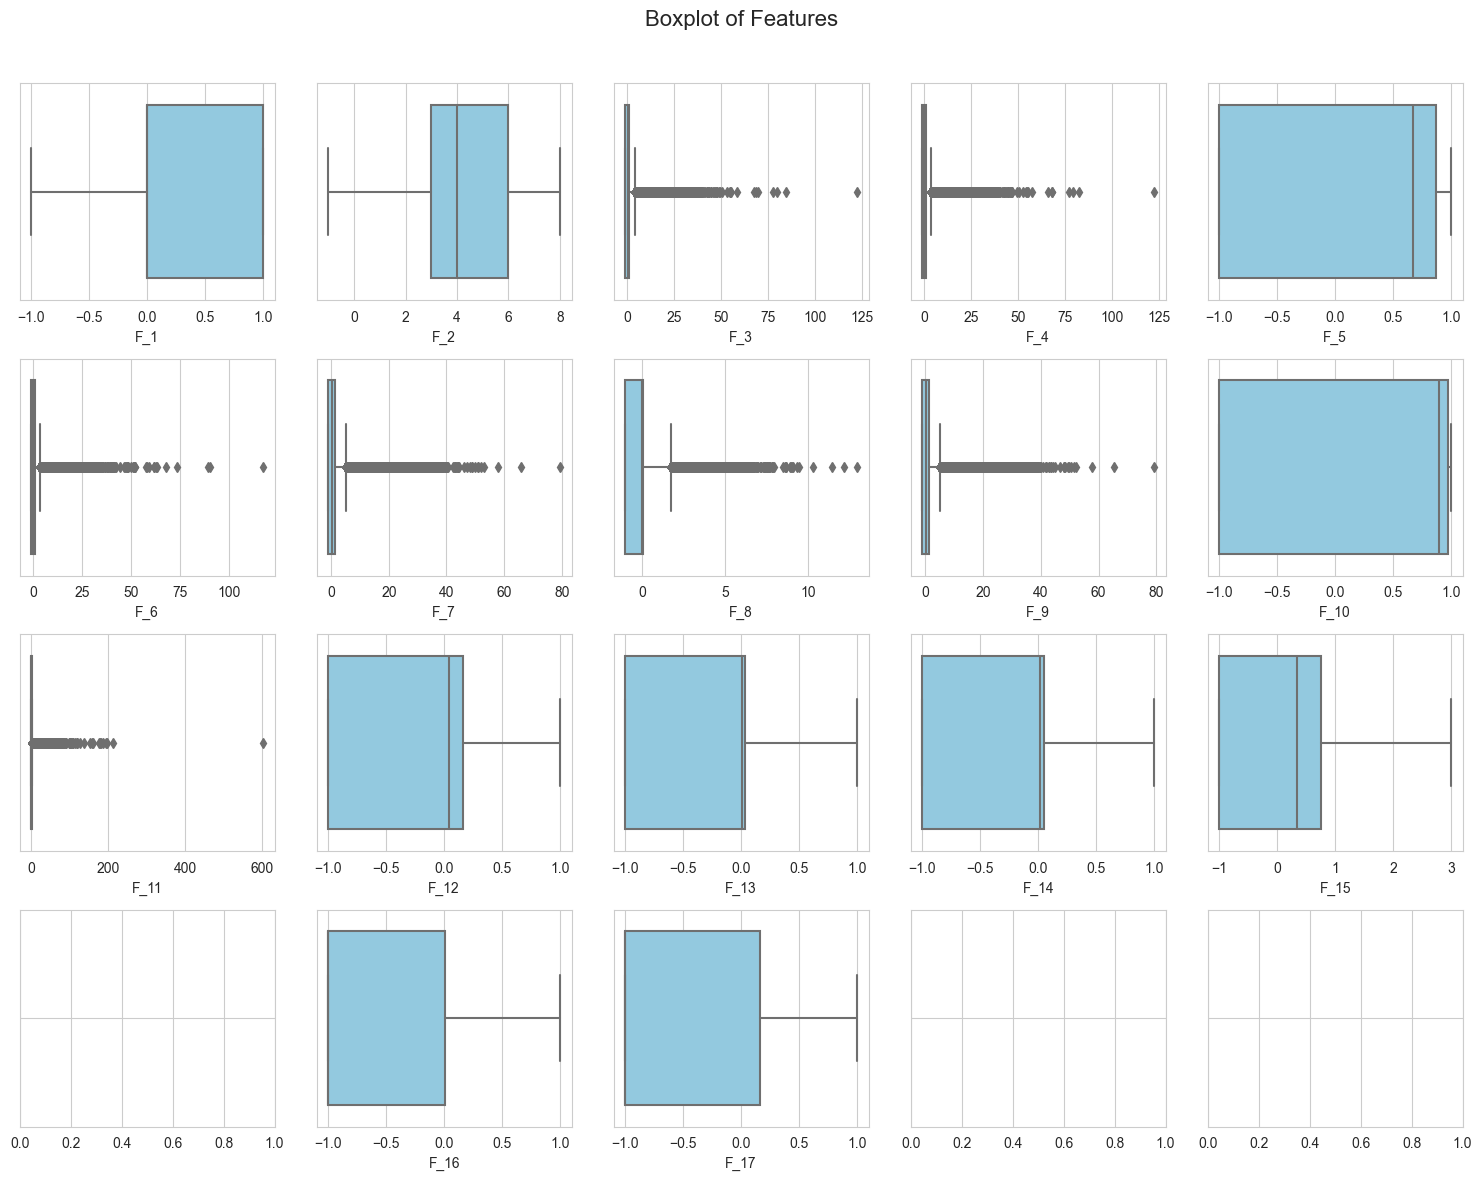

In [21]:
# 设置图的大小
fig, axes = plt.subplots(4, 5, figsize=(15, 12), sharey=True)
fig.suptitle('Boxplot of Features', fontsize=16)

# 绘制每个特征的箱线图（前三行）
for i, column in enumerate(df.columns[:15]):
    sns.boxplot(x=df[column], ax=axes[i // 5, i % 5], color='skyblue')

# 绘制最后两个特征的箱线图（最后一行居中）
for i, column in enumerate(df.columns[15:]):
    sns.boxplot(x=df[column], ax=axes[3, i + 1], color='skyblue')

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 显示图
plt.show()

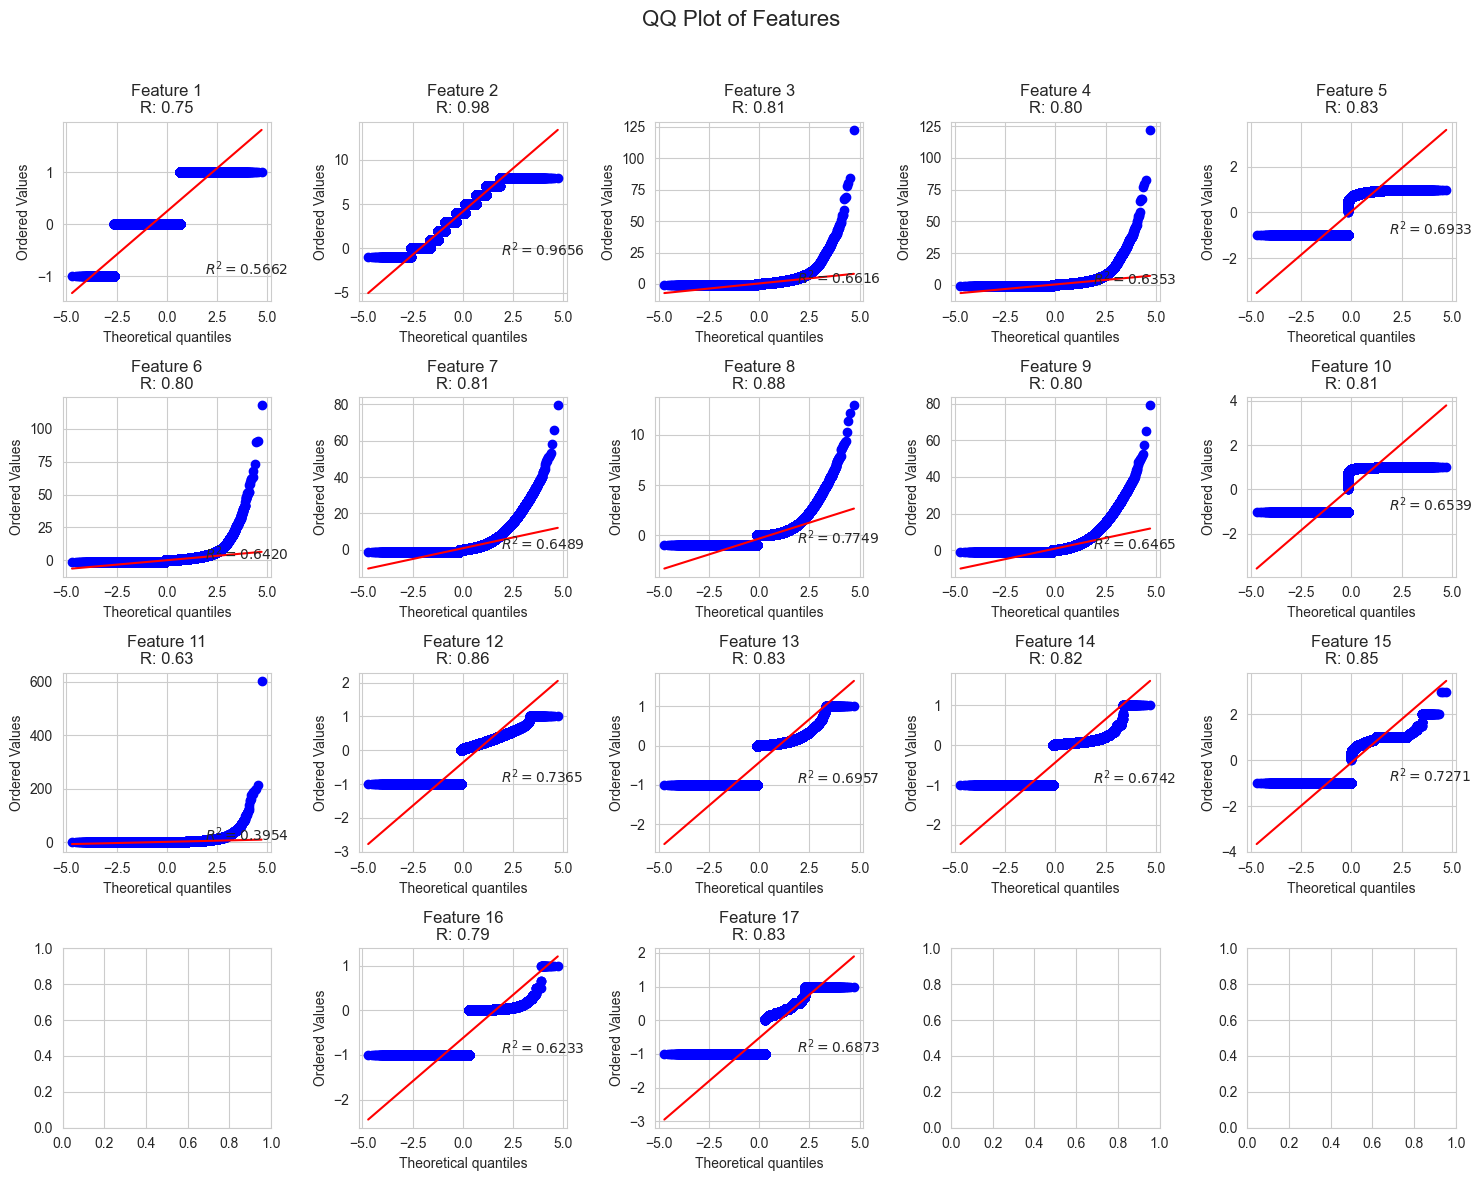

In [22]:
from scipy.stats import probplot
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('QQ Plot of Features', fontsize=16)

# 绘制每个特征的 QQ 图（前三行）
for i, column in enumerate(df.columns[:15]):
    _, (slope, intercept, r) = probplot(df[column], plot=axes[i // 5, i % 5], fit=True, rvalue=True)
    axes[i // 5, i % 5].set_title(f'Feature {i + 1}\nR: {r:.2f}')

# 绘制最后两个特征的 QQ 图（最后一行居中）
for i, column in enumerate(df.columns[15:]):
    _, (slope, intercept, r) = probplot(df[column], plot=axes[3, i + 1], fit=True, rvalue=True)
    axes[3, i + 1].set_title(f'Feature {i + 16}\nR: {r:.2f}')

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 显示图
plt.show()

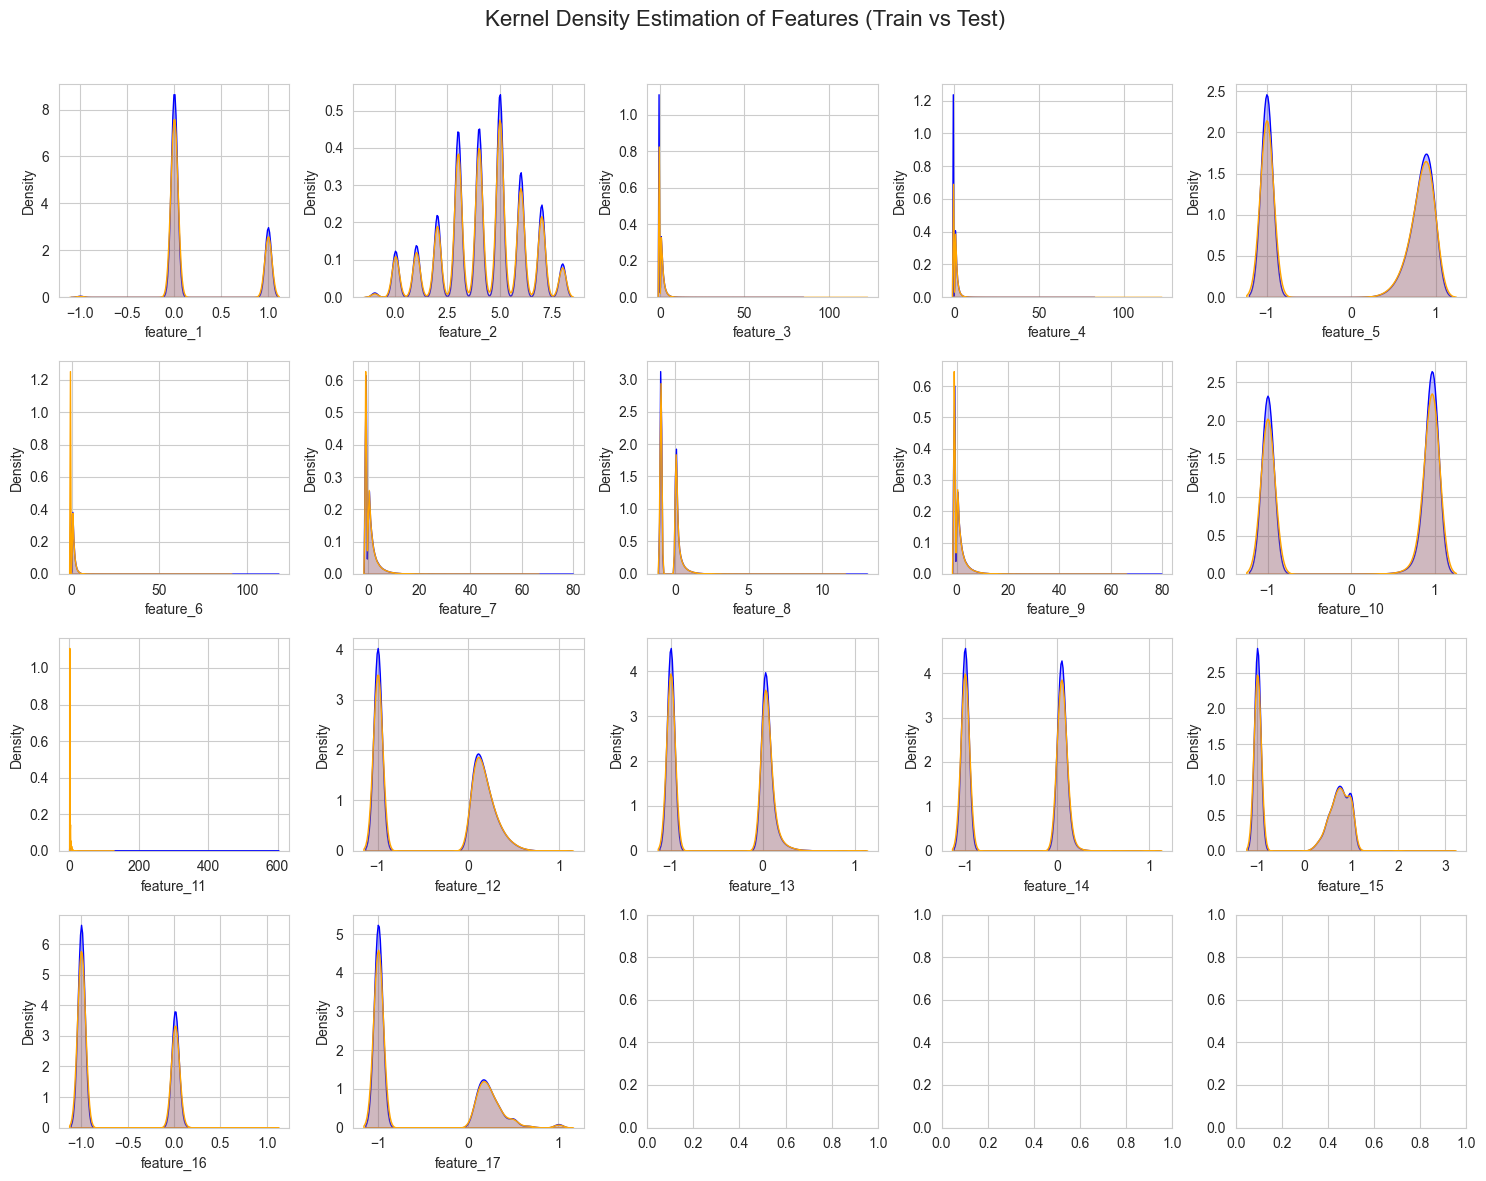

In [23]:
df_train = pd.DataFrame(x[train_mask], columns=[f'feature_{i + 1}' for i in range(17)])
df_test = pd.DataFrame(x[test_mask], columns=[f'feature_{i + 1}' for i in range(17)])

# 设置图的大小
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Kernel Density Estimation of Features (Train vs Test)', fontsize=16)

# 绘制每个特征的核密度图（前三行）
for i, column in enumerate(df_train.columns):
    sns.kdeplot(df_train[column], ax=axes[i // 5, i % 5], color='blue', label='Train', fill=True)
    sns.kdeplot(df_test[column], ax=axes[i // 5, i % 5], color='orange', label='Test', fill=True)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 显示图
plt.show()

In [24]:
# 计算均值和标准差
mean_x = np.mean(x)
std_x = np.std(x)

# 确定上下界
lower_bound = mean_x - 3 * std_x
upper_bound = mean_x + 3 * std_x

# 替换离群点
x_clipped = np.clip(x, lower_bound, upper_bound)